In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
!pip install wordcloud

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/ratriayu1005/TA/main/PUBGM_REVIEW1.csv"
df0 = pd.read_csv(url)
df0

,no,username,date_review,review_title,review,rating
0,1,Doni Imanuel,7/8/2022,Crash,This game crash on my Iphone 6 at the game hom...,1.0
1,2,Joeyuway,3/8/2022,The best battle royale!,Everything works fine on 8+. Very addicted now...,5.0
2,3,Mrblade98,7/8/2022,"Low Frame Rate, Lag, App Size Too Big, scam cl...",Low frame Rate when meet enemies in all map. W...,3.0
3,4,Frando Pasulatan,9/8/2022,Lag,"Hello sir, Greetings og the day. Sir we reques...",5.0
4,5,just a call,9/8/2022,I like it this game so fun,play this game,5.0
...,...,...,...,...,...,...
495,496,IphoneXR,3/9/2021,Download more than 3 hours,"Download is slow, please fix it",2.0
496,497,Daffagaming,6/9/2021,Having fun,this game so good,5.0
497,498,joenne huang,14/9/2021,crash,"i want to log in after update, but its always ...",3.0
498,499,leekehensz,14/9/2021,iPhone xr,"excellent for the graphic, but its fast to get...",1.0


In [4]:
df = df0

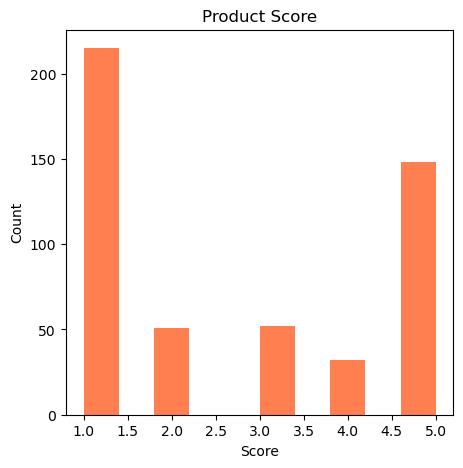

In [5]:
#step2-Data Analysis

# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

# Product Scores
df['rating'].plot(kind='hist', figsize=(5, 5), color='coral')

plt.title('Product Score') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Score') # add x-label

plt.show()
#fig = px.histogram(df, x="Score")
#fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',marker_line_width=1.5)
#fig.update_layout(title_text='Product Score')
#fig.show()

In [6]:
#wordcloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


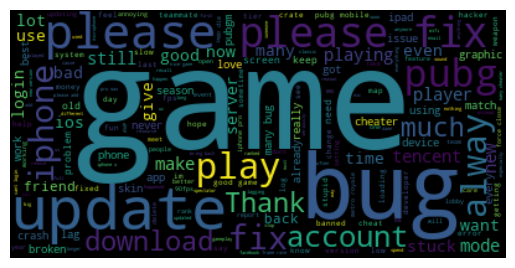

In [7]:
# Create stopword list:

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [8]:
#Step 3: Classifying Tweets
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['rating'] != 3]
df['sentiment'] = df['rating'].apply(lambda rating : +1 if rating > 3 else -1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19372\1890743970.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



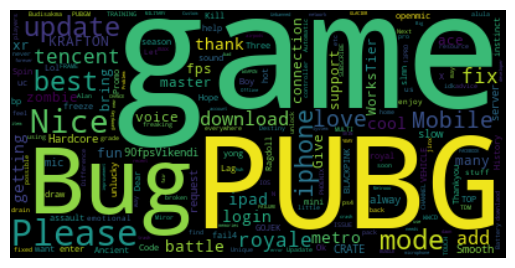

In [9]:
#Step 4: More Data Analysis
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

#Wordcloud — Positive Sentiment
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.review_title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('positif.png')
plt.show()

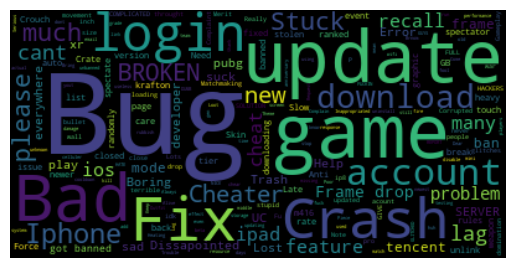

In [10]:
#Wordcloud — Negative Sentiment
neg = " ".join(review for review in negative.review_title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19372\2434422623.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19372\2434422623.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



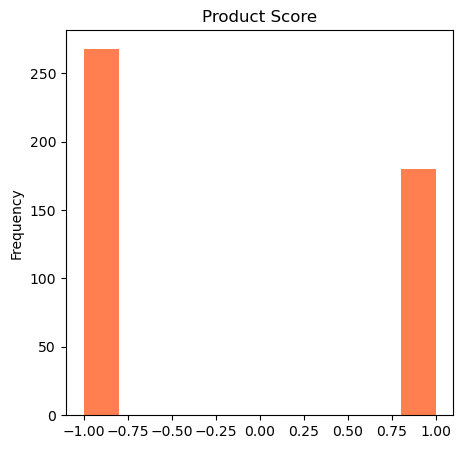

In [11]:
#product sentiment
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentiment'].replace({1 : 'positive'})

#df['sentimentt'].plot(kind='hist', figsize=(5, 5), color='coral')
df['sentiment'].plot(kind='hist', figsize=(5, 5), color='coral')

plt.title('Product Score') # add a title to the histogram
#plt.ylabel('Count') # add y-label
#plt.xlabel('Sentiment') # add x-label

plt.show()

#fig = px.histogram(df, x="sentimentt")
#fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',marker_line_width=1.5)
#fig.update_layout(title_text='Product Sentiment')
#fig.show()

In [12]:
#Step 5: Building the Model

#Data Cleaning
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['review'] = df['review'].apply(remove_punctuation)
df = df.dropna(subset=['review_title'])
df['review_title'] = df['review_title'].apply(remove_punctuation)

#split dataframe
dfNew = df[['review_title','sentiment']]
dfNew.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19372\3063081159.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,review_title,sentiment
0,Crash,-1
1,The best battle royale,1
3,Lag,1
4,I like it this game so fun,1
5,Please fix,-1


In [13]:
# random split train and test data
X = dfNew.review_title
y = dfNew.sentiment
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#index = df.index
#df['random_number'] = np.random.randn(len(index))
#train = df[df['random_number'] <= 0.8]
#test = df[df['random_number'] > 0.8]

In [14]:
#Create a bag of words

# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)

In [15]:
import pickle
from sklearn import model_selection
# save the model to disk
filename = 'count_vectorizer.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

# Random Forest

In [16]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [17]:
#Split target and independent variables

X_train = train_matrix
X_test = test_matrix
#y_train = train['sentiment']
#y_test = test['sentiment']

In [18]:
# fit model on data
rf.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
predictions = rf.predict(X_test)

In [20]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[43, 17],
       [ 5, 25]], dtype=int64)

In [21]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.90      0.72      0.80        60
           1       0.60      0.83      0.69        30

    accuracy                           0.76        90
   macro avg       0.75      0.78      0.75        90
weighted avg       0.80      0.76      0.76        90



In [22]:
# save the model to disk
import pickle
from sklearn import model_selection
# save the model to disk
filename = 'random_model.sav'
pickle.dump(rf, open(filename, 'wb'))


In [23]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7555555555555555


# Logistic Regression

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [25]:
#Split target and independent variables

X_train = train_matrix
X_test = test_matrix
#y_train = train['sentiment']
#y_test = test['sentiment']

In [26]:
# Fit model on data

lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
predictions = lr.predict(X_test)

In [28]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[43, 15],
       [ 5, 27]], dtype=int64)

In [29]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.90      0.74      0.81        58
           1       0.64      0.84      0.73        32

    accuracy                           0.78        90
   macro avg       0.77      0.79      0.77        90
weighted avg       0.81      0.78      0.78        90



In [30]:
# save the model to disk
import pickle
from sklearn import model_selection

# save the model to disk
filename = 'lr_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [31]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7777777777777778


#  SVM

In [32]:
#Naive Bayes
from sklearn.svm import SVC
svm = SVC(probability=True)

In [33]:
#Split target and independent variables

X_train = train_matrix
X_test = test_matrix
#y_train = train['sentiment']
#y_test = test['sentiment']

In [34]:
# Fit model on data

svm.fit(X_train,y_train)

SVC(probability=True)

In [35]:
predictions = svm.predict(X_test)

In [36]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[45, 19],
       [ 3, 23]], dtype=int64)

In [37]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.94      0.70      0.80        64
           1       0.55      0.88      0.68        26

    accuracy                           0.76        90
   macro avg       0.74      0.79      0.74        90
weighted avg       0.82      0.76      0.77        90



In [38]:
# save the model to disk
import pickle
from sklearn import model_selection

# save the model to disk
filename = 'svm_model.sav'
pickle.dump(svm, open(filename, 'wb'))

In [39]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7555555555555555


# Naive Bayes

In [40]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [41]:
#Split target and independent variables

X_train = train_matrix
X_test = test_matrix
#y_train = train['sentiment']
#y_test = test['sentiment']

In [42]:
# Fit model on data

nb.fit(X_train.toarray(),y_train)

GaussianNB()

In [43]:
predictions = nb.predict(X_test.toarray())

In [44]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[20,  4],
       [28, 38]], dtype=int64)

In [45]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.42      0.83      0.56        24
           1       0.90      0.58      0.70        66

    accuracy                           0.64        90
   macro avg       0.66      0.70      0.63        90
weighted avg       0.77      0.64      0.66        90



In [46]:
# save the model to disk
import pickle
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
# save the model to disk
filename = 'nb_model.sav'
pickle.dump(nb, open(filename, 'wb'))

In [47]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test.toarray(), y_test)
print(result)

0.6444444444444445
